## Machine Learning Foundation & Techniques: Assignment 8

### Experiment with k Nearest Neighbor
---
Implement any algorithm that ‘returns’ the k Nearest Neighbor hypothesis discussed in page 8 of lecture 214. Evaluate with the 0/1 error.

$$   
g_{k-nbor}(x) = sign\Bigg(\sum\limits_{\text{$m$: $k$ cloest examples to x}}y_{m}\Bigg)
$$ 

Run the algorithm on the following set for training: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw8/hw8_train.dat 

and the following set for testing: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw8/hw8_test.dat

#### Plot $E_{in}(g_{k-nbor})$ for $k = 1, 3, 5, 7, 9$. Briefly describe your findings.
#### Plot $E_{out}(g_{k-nbor})$ for $k = 1, 3, 5, 7, 9$. Briefly describe your findings.
#### Implement $g_{uniform}$ on page 8 of lecture 214. Plot $E_{in}(g_{uniform})$ for $\gamma = 0.001, 0.1, 1, 10, 100$. Briefly describe your findings.
#### Plot $E_{out}(g_{uniform})$ for $\gamma = 0.001, 0.1, 1, 10, 100$. Briefly describe your findings.

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_data(file):
    
    data = pd.read_csv(file, sep = ' ', header = None)
    X = np.array(data.loc[:, :8])
    Y = np.array(data.loc[:, 9:])
    
    return X, Y

##### Build model

In [3]:
class KNN:
    """K nearest neighbor model with two methods: 'knbor' with simple KNN and 'uniform' with RBF kernel."""
    
    def __init__(self, k):
        self.k = k
    
    
    def train(self, X, Y):
        """Construct the training set for the KNN model."""
        
        self.X_train = X
        self.Y_train = Y
        self.N = self.X_train.shape[0]
    
    
    def knbor(self, x):
        """Select the k nearest points and compute the score by uniform aggregation for one data point."""
        
        dist_index = [(np.sum((x - self.X_train[i])**2), i) for i in range(self.N)]
        dist_index.sort()
        k_neighbors = dist_index[:self.k]
        votes = []
        for neighbor in k_neighbors:
            index = neighbor[1]
            votes.append(self.Y_train[index])
        
        return 1 if np.sum(votes) >= 0 else -1
    
    
    def RBF_kernel(self, a, b, gamma):
        return np.exp(-gamma * np.sum((a - b)**2))
        
    
    def uniform(self, x, gamma):
        """Select the k nearest points and compute the score by uniformly aggregating the RBF values for one data point."""

        dist_index = [(np.sum((x - self.X_train[i])**2), i) for i in range(self.N)]
        dist_index.sort()
        k_neighbors = dist_index[:self.k]
        votes = []
        for neighbor in k_neighbors:
            index = neighbor[1]
            score = self.RBF_kernel(x, self.X_train[index], gamma) * self.Y_train[index]
            votes.append(score)
            
        return 1 if np.sum(votes) >= 0 else -1
    
    
    def predict(self, X_test, method = 'knbor', gamma = None):
        """Predict all data points in the data set with specifed method. Default method is 'knbor'."""
        
        Y_pred = []
        for x in X_test:
            pred = self.uniform(x, gamma) if method == 'uniform' else self.knbor(x)
            Y_pred.append(pred)
            
        return np.array(Y_pred)
        

##### Experiment

In [4]:
train_file = 'data/hw8_train.dat.txt'; test_file = 'data/hw8_test.dat.txt'
X_train, Y_train = generate_data(train_file); X_test, Y_test = generate_data(test_file)


KNN model with k = 1
	Simple KNN
	  Training error: 0.00%; Testing error: 34.40%
	RBF Kernel
	  Gamma = 0.001; Training error: 0.00%; Testing error: 34.40%
	  Gamma = 0.100; Training error: 0.00%; Testing error: 34.40%
	  Gamma = 1.000; Training error: 0.00%; Testing error: 34.40%
	  Gamma = 10.000; Training error: 0.00%; Testing error: 34.40%
	  Gamma = 100.000; Training error: 0.00%; Testing error: 34.40%

KNN model with k = 3
	Simple KNN
	  Training error: 10.00%; Testing error: 29.90%
	RBF Kernel
	  Gamma = 0.001; Training error: 10.00%; Testing error: 29.90%
	  Gamma = 0.100; Training error: 10.00%; Testing error: 29.90%
	  Gamma = 1.000; Training error: 0.00%; Testing error: 31.50%
	  Gamma = 10.000; Training error: 0.00%; Testing error: 34.60%
	  Gamma = 100.000; Training error: 0.00%; Testing error: 34.40%

KNN model with k = 5
	Simple KNN
	  Training error: 16.00%; Testing error: 31.60%
	RBF Kernel
	  Gamma = 0.001; Training error: 16.00%; Testing error: 31.60%
	  Gamma = 0.1

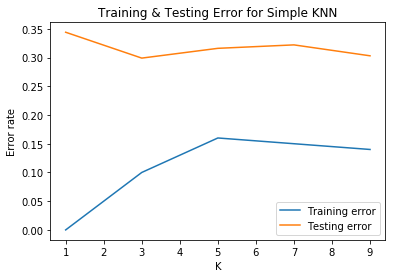

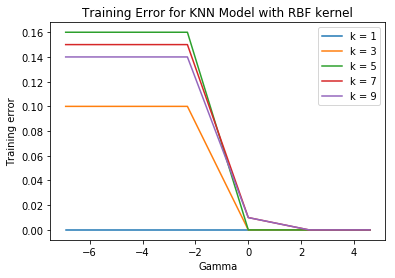

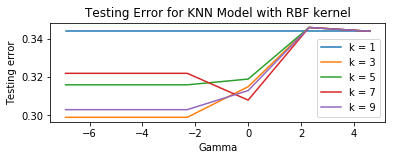

In [5]:
start = time.clock()

# create 3 figures
plt.figure(1)
plt.figure(2)
plt.title('Training Error for KNN Model with RBF kernel'); plt.xlabel('log(gamma)'); plt.ylabel('Training error')
plt.figure(3)
plt.title('Testing Error for KNN Model with RBF kernel'); plt.xlabel('log(gamma)'); plt.ylabel('Testing error')

K = [1,3, 5, 7, 9]
gamma = [0.001, 0.1, 1, 10, 100]

err_in_knbor = []
err_out_knbor = []

for k in K:
    print('\nKNN model with k = %d' %k)
    
    knn = KNN(k)
    knn.train(X_train, Y_train)
    
    print('\tSimple KNN')
    Y_train_pred = knn.predict(X_train)
    Y_test_pred = knn.predict(X_test)
    
    err_in = np.sum(Y_train_pred != Y_train.flatten()) / len(Y_train)
    err_out = np.sum(Y_test_pred != Y_test.flatten()) / len(Y_test)
    err_in_knbor.append(err_in); err_out_knbor.append(err_out)
    
    print('\t  Training error: %.2f%%; Testing error: %.2f%%' %((err_in * 100),(err_out * 100)))        
    
    
    print('\tRBF Kernel')
    err_in_uniform = []; err_out_uniform = []
    for r in gamma:
        Y_train_pred = knn.predict(X_train, method = 'uniform', gamma = r)
        Y_test_pred = knn.predict(X_test, method = 'uniform', gamma = r)
        
        err_in = np.sum(Y_train_pred != Y_train.flatten()) / len(Y_train)
        err_out = np.sum(Y_test_pred != Y_test.flatten()) / len(Y_test)
        err_in_uniform.append(err_in); err_out_uniform.append(err_out)
        
        print('\t  Gamma = %.3f; Training error: %.2f%%; Testing error: %.2f%%' %(r, (err_in * 100),(err_out * 100)))    
    
    plt.figure(2)
    plt.plot(np.log(gamma), err_in_uniform, label = 'k = %d' %k); plt.legend()
    
    plt.figure(3)
    plt.plot(np.log(gamma), err_out_uniform, label = 'k = %d' %k); plt.legend()

    
plt.figure(1)
plt.plot(K, err_in_knbor, label = 'Training error')
plt.plot(K, err_out_knbor, label = 'Testing error')
plt.legend()
plt.title('Training & Testing Error for Simple KNN')
plt.xlabel('K'); plt.ylabel('Error rate')

print('\nUsing %.2f seconds' % (time.clock() - start))

### Experiment with k-Means
---
Implement the $k$-Means algorithm (page 16 of lecture 214). Randomly select $k$ instances from $\{x_n\}$ to
initialize your $\mu_m$. 

Run the algorithm on the following set for training: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw8/hw8_nolabel_train.dat

and repeat the experiment for 500 times. Calculate the clustering $E_{in}$ by 

$$
\frac{1}{N} \sum\limits^N_{n = 1} \sum\limits^M_{m = 1} \big[\big[x_n \in S_m \big]\big] \big|\big|x_n - \mu_m \big|\big|^2
$$

as described on page 13 of lecture 214 for $M = k$.

#### Plot the average $E_{in}$ over 500 experiments for $k = 2, 4, 6, 8, 10$. Briefly describe your findings.

In [6]:
data = pd.read_csv('data/hw8_nolabel_train.dat.txt', sep = ' ', header = None).dropna(axis = 1)
#data.shape

(100, 9)

##### Build model

In [7]:
class KMeans:
    
    def __init__(self, k):
        self.k = k

    
    def train(self, data):
        self.data = data
        self.N = data.shape[0]
    
        # initialize mu
        self.mu = self.data.sample(self.k).values

        # alternating optimization
        converge = False
        while not converge:
            # cluters dictionary to store data in each cluster
            self.clusters = {i: [] for i in range(len(self.mu))}

            # partition
            for x in self.data.values:
                dist = [np.sum((x - center)**2) for center in self.mu]
                self.clusters[np.argmin(dist)].append(x)

            # update mu
            for j in self.clusters:
                new_mu = sum(self.clusters[j]) / len(self.clusters[j])
                if np.array_equal(new_mu, self.mu[j]):
                    self.mu[j] = new_mu
                else:
                    converge = True   # stop while converge

        return self.clusters, self.mu


    def clustering_error(self):
        error = 0
        for i in range(self.k):
            error += sum([np.sum((x - self.mu[i])**2) for x in self.clusters[i]])
        
        return error / self.N
        

##### Experiment

Training k-means with k = 2
Training k-means with k = 4
Training k-means with k = 6
Training k-means with k = 8
Training k-means with k = 10

Using 20.54 seconds


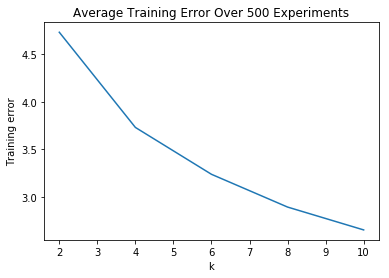

In [8]:
K = [2, 4, 6, 8, 10]
experiments = 500

start = time.clock()

avg_err_in = []
for k in K:
    print('Training k-means with k = %d' %k)
    
    err = []
    for i in range(experiments):
        kmeans = KMeans(k)
        kmeans.train(data)
        err.append(kmeans.clustering_error())
    
    avg_err_in.append(np.mean(err))

print('\nUsing %.2f seconds' % (time.clock() - start))

plt.plot(K, avg_err_in)
plt.title('Average Training Error Over %d Experiments' %experiments)
plt.xlabel('k'); plt.ylabel('Training error')